# Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt
import functools

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Conv1D, Embedding,Reshape, Concatenate,BatchNormalization,GlobalMaxPooling1D,GlobalAveragePooling1D
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import regularizers
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report


# Training Data

In [2]:
data = pd.read_csv('../splited_RASFF_DATA.csv', sep=';', 
                header=0, index_col = 0)
data = data.sample(frac = 1)
df = data
df

FileNotFoundError: [Errno 2] No such file or directory: '../splited_RASFF_DATA.csv'

# Basic Pre-processing

In [3]:
df['HAZARDS_CAT'] = df['HAZARDS_CAT'].astype(str)
df['DATE_CASE'] = df['DATE_CASE'].astype(str)
df['DATE_CASE'] =pd.to_datetime(df.DATE_CASE)
df['DATE_CASE'] = df.DATE_CASE.dt.month

# Features Selection

In [4]:
features = [0,1,6,8]
target = [2]
X = df.iloc[:,features]
y = df.iloc[:,target]

In [5]:
X

,DATE_CASE,NOT_COUNTRY,DISTRIBUTION_STAT,COUNT_ORIGEN
33221,7,Netherlands,distribution to other member countries,United States
114570,9,Austria,distribution on the market (possible),Taiwan
99242,9,Italy,distribution on the market (possible),Germany
60993,9,Germany,distribution to other member countries,United States
26886,12,Spain,product not (yet) placed on the market,Seychelles
...,...,...,...,...
106339,9,United Kingdom,no distribution,United States
17333,6,Sweden,distribution to other member countries,Poland
77404,2,Germany,distribution to other member countries,Romania
36814,3,Greece,product not (yet) placed on the market,Nigeria


In [6]:
y

,PROD_CAT
33221,cereals and bakery products
114570,food contact materials
99242,milk and milk products
60993,"dietetic foods, food supplements, fortified foods"
26886,fish and fish products
...,...
106339,"nuts, nut products and seeds"
17333,fruits and vegetables
77404,prepared dishes and snacks
36814,"nuts, nut products and seeds"


In [7]:
ency = OneHotEncoder(handle_unknown='ignore', sparse = False)
ency.fit(y.values)
y_one_hot = ency.transform(y.values)

# Test Data

## Loaded

In [8]:
#Este dataset que carga aquí no se usa nunca. Se sobreescriben sus variables.
'''
data = pd.read_csv('../splited_2019_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data = data.sample(frac = 1)
test = data
test
'''

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
215,2019-09-02,Italy,bivalve molluscs and products thereof,food,not serious,withdrawal from recipient(s),distribution to other member countries,microbial contaminants (other),Spain,Croatia,
8023,2019-02-05,Belgium,prepared dishes and snacks,food,serious,import not authorised,distribution to other member countries,foreign bodies,Belgium,Luxembourg,
8276,2019-01-30,Ireland,herbs and spices,food,serious,withdrawal from recipient(s),distribution to other member countries,environmental pollutants,Czech Republic,Hungary,Denmark
9222,2019-01-21,Germany,fruits and vegetables,food,serious,withdrawal from the market,distribution to other member countries,composition,South Korea,Germany,INFOSAN
328,2019-08-30,Germany,feed materials,feed,serious,official detention,product not (yet) placed on the market,mycotoxins,Argentina,,Germany
...,...,...,...,...,...,...,...,...,...,...,...
6410,2019-03-13,Poland,milk and milk products,food,serious,public warning - press release,distribution to other member countries,pathogenic micro-organisms,Poland,France,United Kingdom
4968,2019-04-18,Germany,"nuts, nut products and seeds",food,serious,informing consignor,distribution restricted to notifying country,pathogenic micro-organisms,United States,Germany,INFOSAN
5705,2019-04-03,United Kingdom,poultry meat and poultry meat products,food,serious,re-dispatch,product not (yet) placed on the market,pathogenic micro-organisms,Brazil,,United Kingdom
9439,2019-01-18,Hungary,"dietetic foods, food supplements, fortified foods",food,serious,withdrawal from the market,distribution to other member countries,environmental pollutants,China,Romania,Germany


## Preprocessing

In [9]:
'''
test['HAZARDS_CAT'] = test['HAZARDS_CAT'].astype(str)
test['DATE_CASE'] = test['DATE_CASE'].astype(str)
test['DATE_CASE'] =pd.to_datetime(test.DATE_CASE)
test['DATE_CASE'] = test.DATE_CASE.dt.month
'''

## Features

In [10]:
features = [0,1,6,8]
target = [2]
'''
X_val = test.iloc[:,features]
y_val = test.iloc[:,target]
'''

In [11]:
y_val_one_hot = ency.transform(y_val.values)

# Split train-test-val

In [12]:
categoical_vars = ['DATE_CASE','NOT_COUNTRY','DISTRIBUTION_STAT','COUNT_ORIGEN']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42,shuffle = True)

# Coding and conversion to lists for being able to introduce it into the model

In [15]:
def preproc(X_train, X_test, Xvalidation_data):
    input_list_train = []
    input_list_test = []
    input_list_testval = []
    
    for c in categoical_vars:
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i       
        
        input_list_train.append(X_train[c].map(val_map).values)
        input_list_test.append(X_test[c].map(val_map).fillna(0).values)
            input_list_testval.append(X_val[c].map(val_map).fillna(0).values)

    return input_list_train, input_list_test,input_list_testval

In [16]:
input_list_train,input_list_test,input_list_testval = preproc(X_train,X_test, X_val)

# Metrics Definition

In [17]:
top3_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

top2_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top2_acc.__name__ = 'top2_acc'

In [18]:
def top_1_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=1) 

In [19]:
def top_2_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2) 

In [20]:
def top_3_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=3) 

# Embeddings + mlp Models (cases 1 and 3)

In [21]:
input_models=[]
output_embeddings=[]

for categorical_var in categoical_vars:
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
    input_name= 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
   
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    
    input_models.append(input_model)
    output_embeddings.append(output_model)
  

output = Concatenate()(output_embeddings)
output = Dense(2048,activation="relu")(output)
output= Dropout(0.3)(output)
output = Dense(1024,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(512,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(38, activation='softmax')(output)
model = Model(inputs=input_models, outputs=output)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])

In [23]:
 hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 5 , batch_size = 64, verbose=1)

Epoch 1/5
1327/1327 [==============================] - 22s 17ms/step - loss: 2.0725 - accuracy: 0.4326 - top_1_categorical_accuracy: 0.4326 - top_2_categorical_accuracy: 0.5604 - top_3_categorical_accuracy: 0.6400 - val_loss: 1.7501 - val_accuracy: 0.5160 - val_top_1_categorical_accuracy: 0.5160 - val_top_2_categorical_accuracy: 0.6459 - val_top_3_categorical_accuracy: 0.7183
Epoch 2/5
1327/1327 [==============================] - 22s 16ms/step - loss: 1.6500 - accuracy: 0.5382 - top_1_categorical_accuracy: 0.5382 - top_2_categorical_accuracy: 0.6693 - top_3_categorical_accuracy: 0.7397 - val_loss: 1.5060 - val_accuracy: 0.5789 - val_top_1_categorical_accuracy: 0.5789 - val_top_2_categorical_accuracy: 0.7061 - val_top_3_categorical_accuracy: 0.7715- top_1_categorical_accuracy: 0.5359 - top_2_categorical_accuracy: 0.6668 - top
Epoch 3/5
1327/1327 [==============================] - 21s 16ms/step - loss: 1.4496 - accuracy: 0.5883 - top_1_categorical_accuracy: 0.5883 - top_2_categorical_acc

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_DATE_CASE (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_NOT_COUNTRY (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_DISTRIBUTION_STAT (InputL [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_COUNT_ORIGEN (InputLayer) [(None, 1)]          0                                            
______________________________________________________________________________________________

## Mean Efficiencies

In [26]:
historials = []
evaluations = []
for i in range (1,6):
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])
    hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 25 , batch_size = 64, verbose=0)
    historials.append(hist)
    #evaluation = model.evaluate(x = input_list_testval, y =  y_val_one_hot)
    evaluation = model.evaluate(x = input_list_testval, y =  y_val)
    evaluations. append(evaluation)
    model.save ("model"+str(i)+".h5")

885/885 [==============================] - 2s 3ms/step - loss: 1.5779 - accuracy: 0.6947 - top_1_categorical_accuracy: 0.6947 - top_2_categorical_accuracy: 0.8162 - top_3_categorical_accuracy: 0.8654


In [27]:
suma = 0
for i in evaluations:
    suma = suma + i[2]
print(suma/5)

0.6942273616790772


In [28]:
model.evaluate(x = input_list_testval, y = y_val)

885/885 [==============================] - 2s 3ms/step - loss: 1.5779 - accuracy: 0.6947 - top_1_categorical_accuracy: 0.6947 - top_2_categorical_accuracy: 0.8162 - top_3_categorical_accuracy: 0.8654


[1.5778902769088745,
 0.6946936845779419,
 0.6946936845779419,
 0.8162227272987366,
 0.8653642535209656]

## Training Charts

In [29]:
model.metrics_names

['loss',
 'accuracy',
 'top_1_categorical_accuracy',
 'top_2_categorical_accuracy',
 'top_3_categorical_accuracy']

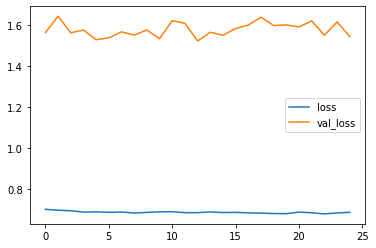

KeyError: 'acc'

In [30]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['acc'], label = 'acc') 
plt.plot(hist.history['val_top_1_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

## Embeddings Representation Test

In [ ]:
embeddings = model.layers[14].get_weights()[0]
embeddings

In [ ]:
embeddings[:,1]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0],embeddings[:,1]) 
plt.show()

In [ ]:
y = embeddings[:,0]
z = embeddings[:,1]
n = [6, 4, 1, 10,8,5,11,3,12,7,2,9]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

## Models Figure 

In [ ]:
plot_model(model, to_file='model3.png',show_shapes=True,show_layer_names=True)
Image(retina=True, filename='model3.png')

## Predictions and inverse transformations (converting the numerical prediction to the predicted category)

In [ ]:
prediction = model.predict(input_list_test)
prediction[0]

In [ ]:
pred = np.around(prediction[12],decimals = 2)
pred

In [ ]:
np.where(pred == 0.97)

In [ ]:
pred[25] = 1

In [ ]:
ency.inverse_transform(np.around(pred.reshape(1, -1),decimals = 3)) #Prediction

In [ ]:
ency.inverse_transform(np.around(y_test[25].reshape(1, -1),decimals = 1)) #Reality

## Grid search tests

In [ ]:
def create_model(activation = 'relu' ):
    input_models=[]
    output_embeddings=[]

    for categorical_var in categoical_vars:
        
        cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
        input_name= 'Input_' + categorical_var.replace(" ", "")
        no_of_unique_cat  = X_train[categorical_var].nunique()
        embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
        input_model = Input(shape=(1,), name=input_name)
        output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
        output_model = Reshape(target_shape=(embedding_size,))(output_model)    
        input_models.append(input_model)
        output_embeddings.append(output_model)



    output = Concatenate()(output_embeddings)
    output = Dense(2500,activation=activation)(output)
    output= Dropout(0.5)(output)
    output = Dense(1500,activation=activation)(output)
    output= Dropout(0.4)(output)
    output = Dense(1000,activation=activation)(output)
    output= Dropout(0.3)(output)
    output = Dense(38, activation='softmax')(output)
    model = Model(inputs=input_models, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size = 512, epochs = 1000)

In [ ]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation = activation)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(input_list_train,y_train,validation_data=(input_list_test,y_test))

# Embeddings Model + conv (case 2)

In [ ]:
input_models=[]
output_embeddings=[]

for categorical_var in categoical_vars:
    
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
    input_name= 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    input_models.append(input_model)
    output_embeddings.append(output_model)

output = Concatenate()(output_embeddings)

output = Reshape(input_shape=(100,), target_shape=(100, 1))(output)


output = Conv1D(filters=128,kernel_size=4, activation = "relu")(output)
output = Conv1D(filters=128,kernel_size=4, activation = "relu")(output)
output = BatchNormalization()(output)
output = MaxPooling1D(pool_size=2)(output)

output = Conv1D(filters=256,kernel_size=3, activation = "relu")(output)
output = Conv1D(filters=256,kernel_size=3, activation = "relu")(output)
output = BatchNormalization()(output)
output = GlobalMaxPooling1D()(output)


output = Dense(512, activation = "relu")(output)

output = Dense(256, activation = "relu")(output)

output = Dense(35, activation='softmax')(output)

model = Model(inputs=input_models, outputs=output)


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=[top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])

In [ ]:
model.summary()

In [ ]:
plot_model(model, to_file='model2.png',show_shapes=True,show_layer_names=True)
Image(retina=True, filename='model2.png')

In [ ]:
hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs =  25, batch_size = 64, verbose= 1)

In [ ]:
model.evaluate(x = input_list_testval, y = y_val)

In [ ]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['categorical_accuracy'], label = 'acc') 
plt.plot(hist.history['val_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()